## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
from tensorflow.keras.models import load_model

from google.colab import drive

## Data Preparation

### Data Loading

In [2]:
drive.mount('drive')

Mounted at drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/rumah123_yogya_unfiltered.csv")
data

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²
...,...,...,...,...,...,...,...,...,...
2015,Rp 500 Juta,https://www.rumah123.com/properti/sleman/hos17...,"Rumah Baru, 500 Juta, Bisa Kpr Di Kalasan, Sleman","Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²
2016,Rp 750 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH MINIMALIS AREA JL KABUPATEN SLEMAN,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²
2017,Rp 756 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH SKANDINAVIAN DI JL GITOGATI NGAGLIK (5 M...,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²
2018,"Rp 1,78 Miliar",https://www.rumah123.com/properti/sleman/hos16...,Rumah Mewah Dekat Kampus Ugm di Maguwoharjo Da...,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [5]:
data.describe(include="all")

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
count,2020,2020,2020,2020,2001.000000,1999.000000,1713.000000,2019,2019
unique,401,2020,1923,69,NaN,NaN,NaN,343,228
top,"Rp 1,5 Miliar",https://www.rumah123.com/properti/yogyakarta/h...,Rumah Dijual di Yogyakarta,"Ngaglik, Sleman",NaN,NaN,NaN,100 m²,36 m²
freq,36,1,18,303,NaN,NaN,NaN,62,116
mean,NaN,NaN,NaN,NaN,3.969015,2.941971,1.559253,NaN,NaN
std,NaN,NaN,NaN,NaN,3.671654,3.517671,1.283030,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN,NaN


### Data Preprocessing

In [6]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
bed,19
bath,21
carport,307
surface_area,1
building_area,1


In [7]:
less = missing_values[missing_values < 1515].index
over = missing_values[missing_values >= 1515].index

In [8]:
numeric_features = data[less].select_dtypes(include=['number']).columns
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

In [9]:
kategorical_features = data[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
    data[column] = data[column].fillna(data[column].mode()[0])

In [10]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0


In [11]:
df = data

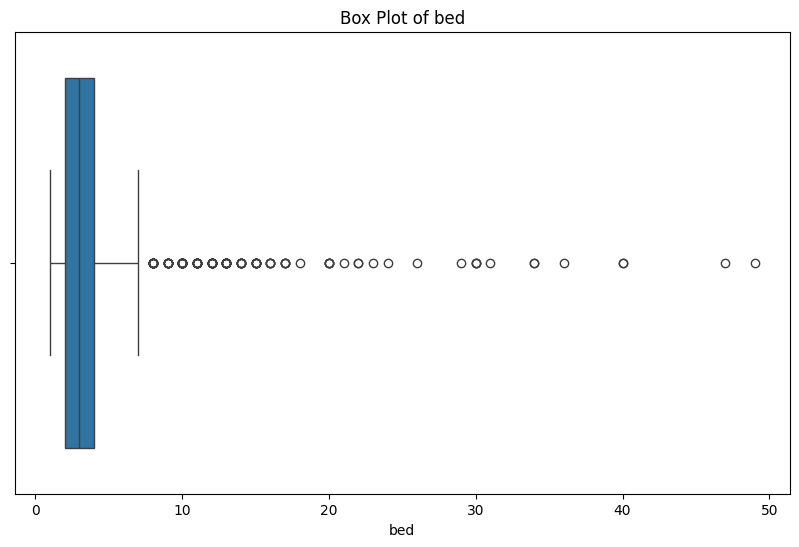

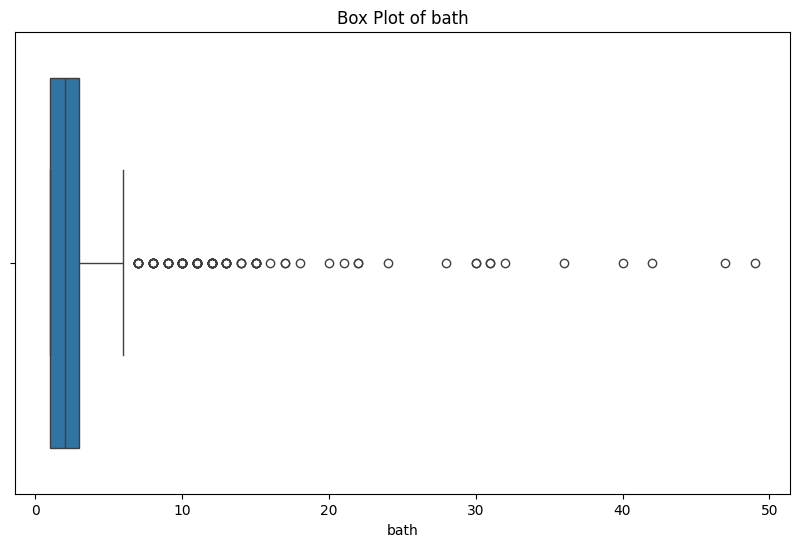

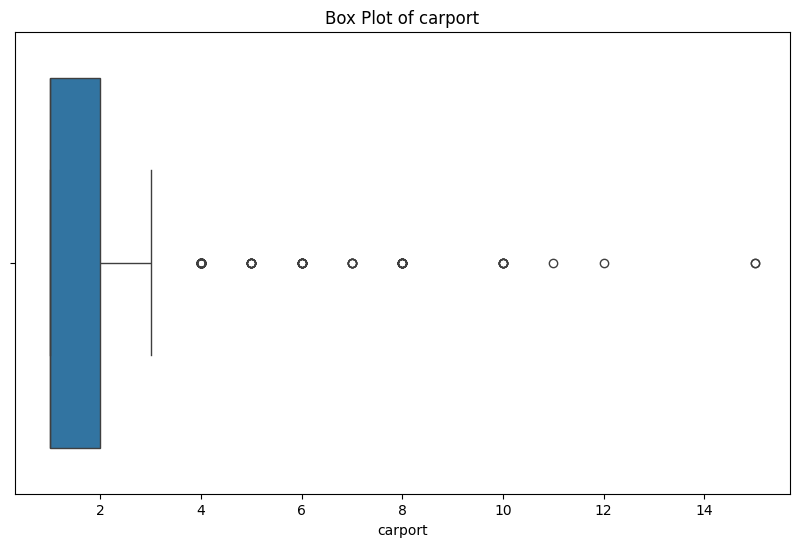

In [12]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [13]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [14]:
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

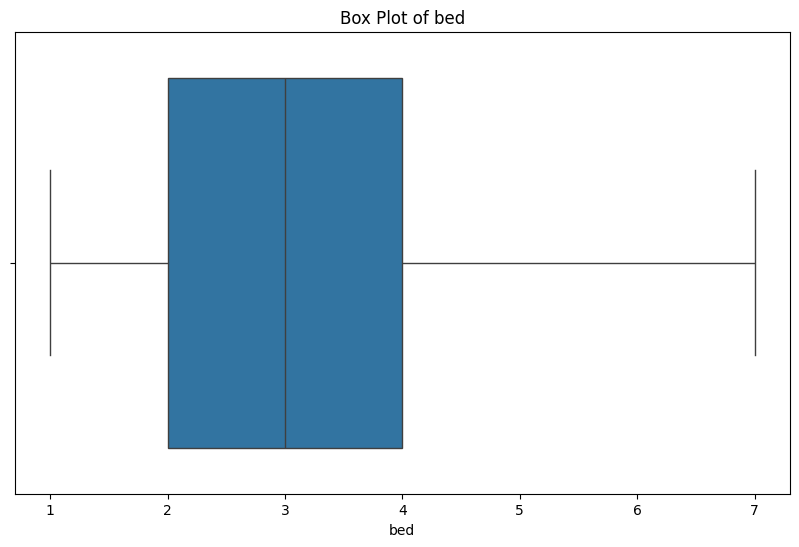

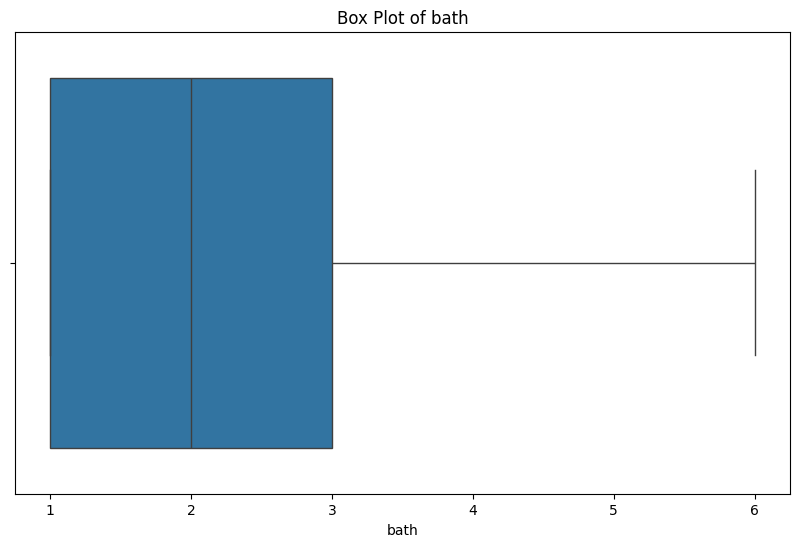

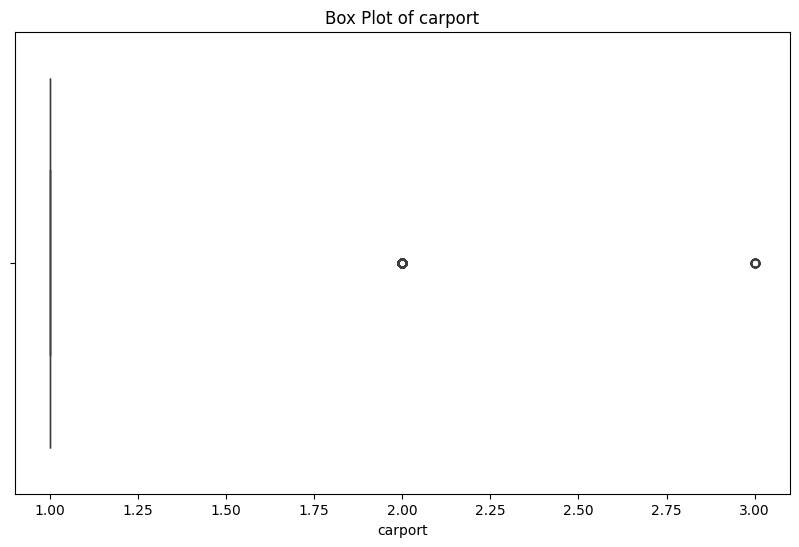

In [15]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

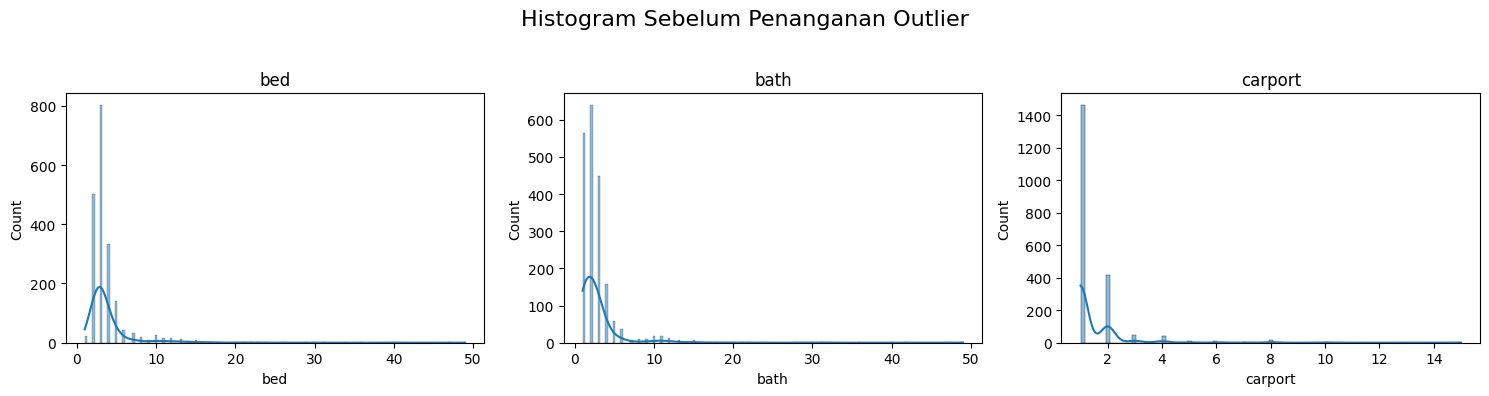

In [16]:
plt.figure(figsize=(15, 4))

# Judul keseluruhan
plt.suptitle("Histogram Sebelum Penanganan Outlier", fontsize=16)

for i in range(3):  # ambil 3 kolom pertama
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[numeric_features[i]], kde=True)
    plt.title(numeric_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Supaya tidak tabrakan dengan suptitle
plt.show()


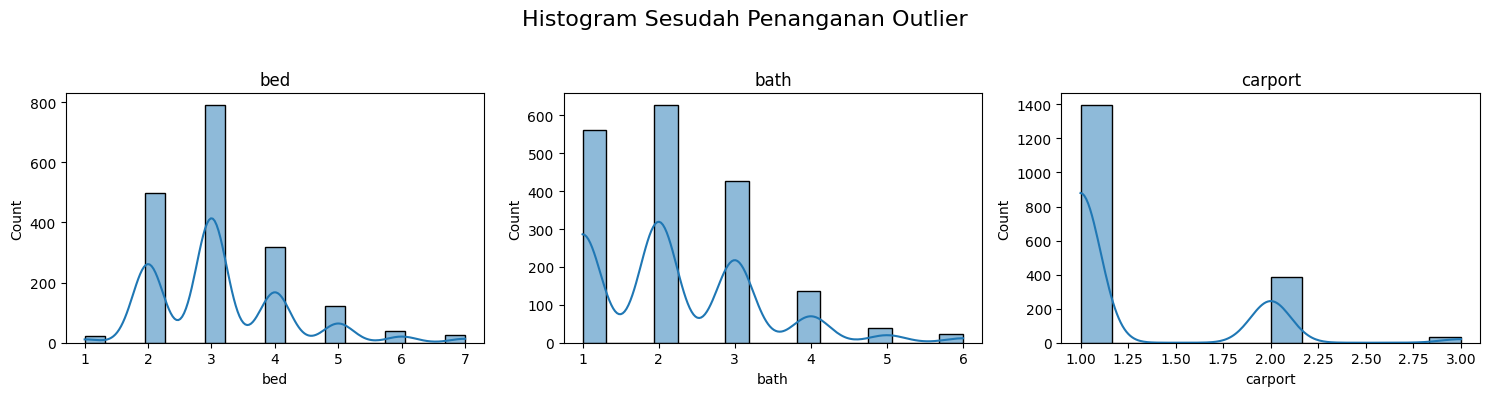

In [17]:
plt.figure(figsize=(15, 4))

# Judul keseluruhan
plt.suptitle("Histogram Sesudah Penanganan Outlier", fontsize=16)

for i in range(3):  # ambil 3 kolom pertama
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[numeric_features[i]], kde=True)
    plt.title(numeric_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Supaya tidak tabrakan dengan suptitle
plt.show()


In [18]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [bed, bath, carport, price, nav-link, description, listing-location, surface_area, building_area]
Index: []


In [19]:
# 2. Fungsi konversi harga
def convert_price(price):
    if pd.isna(price):
        return None

    price = str(price)
    price = price.replace('Rp', '').replace('.', '').strip()
    price = price.replace(',', '.')

    if 'Miliar' in price:
        price = price.replace('Miliar', '').strip()
        return float(price) * 1_000_000_000
    elif 'Juta' in price:
        price = price.replace('Juta', '').strip()
        return float(price) * 1_000_000
    else:
        return None

# 3. Ubah dan ganti kolom 'price'
df['price'] = df['price'].apply(convert_price)

# 4. (Opsional) Hapus baris yang gagal dikonversi (jadi NaN)
df = df.dropna(subset=['price'])

# 5. Cek hasil
print(df['price'].head())
print(df.dtypes)

0    1.790000e+09
1    1.700000e+08
2    6.950000e+08
3    5.600000e+08
4    2.000000e+08
Name: price, dtype: float64
bed                 float64
bath                float64
carport             float64
price               float64
nav-link             object
description          object
listing-location     object
surface_area         object
building_area        object
dtype: object


In [20]:
# Hapus ' m²' dan ubah ke tipe float
df['surface_area'] = df['surface_area'].replace({' m²': '', ',': ''}, regex=True).astype(float)
df['building_area'] = df['building_area'].replace({' m²': '', ',': ''}, regex=True).astype(float)


In [21]:
# Hapus kolom 'nav-link' dan 'description' jika tidak diperlukan
df.drop(['nav-link', 'description'], axis=1, inplace=True)


In [22]:
# Gunakan pd.get_dummies untuk One-Hot Encoding
df = pd.get_dummies(df, columns=['listing-location'], drop_first=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816 entries, 0 to 2019
Data columns (total 74 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   bed                                             1816 non-null   float64
 1   bath                                            1816 non-null   float64
 2   carport                                         1816 non-null   float64
 3   price                                           1816 non-null   float64
 4   surface_area                                    1816 non-null   float64
 5   building_area                                   1816 non-null   float64
 6   listing-location_Banguntapan, Bantul            1816 non-null   bool   
 7   listing-location_Bantul, Bantul                 1816 non-null   bool   
 8   listing-location_Bantul, Yogyakarta             1816 non-null   bool   
 9   listing-location_Berbah, Sleman               

In [24]:
df.describe(include='all')

,bed,bath,carport,price,surface_area,building_area,"listing-location_Banguntapan, Bantul","listing-location_Bantul, Bantul","listing-location_Bantul, Yogyakarta","listing-location_Berbah, Sleman",...,"listing-location_Sidoarum , Sleman","listing-location_Sleman, Sleman","listing-location_Sleman, Yogyakarta","listing-location_Tegalrejo, Yogyakarta","listing-location_Tempel, Sleman","listing-location_Turi, Sleman","listing-location_Umbulharjo, Yogyakarta","listing-location_Wates, Kulon Progo","listing-location_Wirobrajan, Yogyakarta","listing-location_Wonosari, Gunung Kidul"
count,1816.000000,1816.000000,1816.000000,1.816000e+03,1816.000000,1.816000e+03,1816,1816,1816,1816,...,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,1705,1783,1809,1790,...,1815,1708,1781,1809,1811,1812,1777,1810,1792,1810
mean,3.132159,2.192181,1.250000,1.488523e+09,151.711454,1.326194e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.078281,1.098441,0.473251,2.100069e+09,156.075497,5.651004e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,6.900000e+07,4.000000,4.000000e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,1.000000,1.000000,5.927500e+08,93.000000,6.000000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,2.000000,1.000000,9.000000e+08,114.000000,9.000000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,3.000000,1.000000,1.850000e+09,150.000000,1.420000e+02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


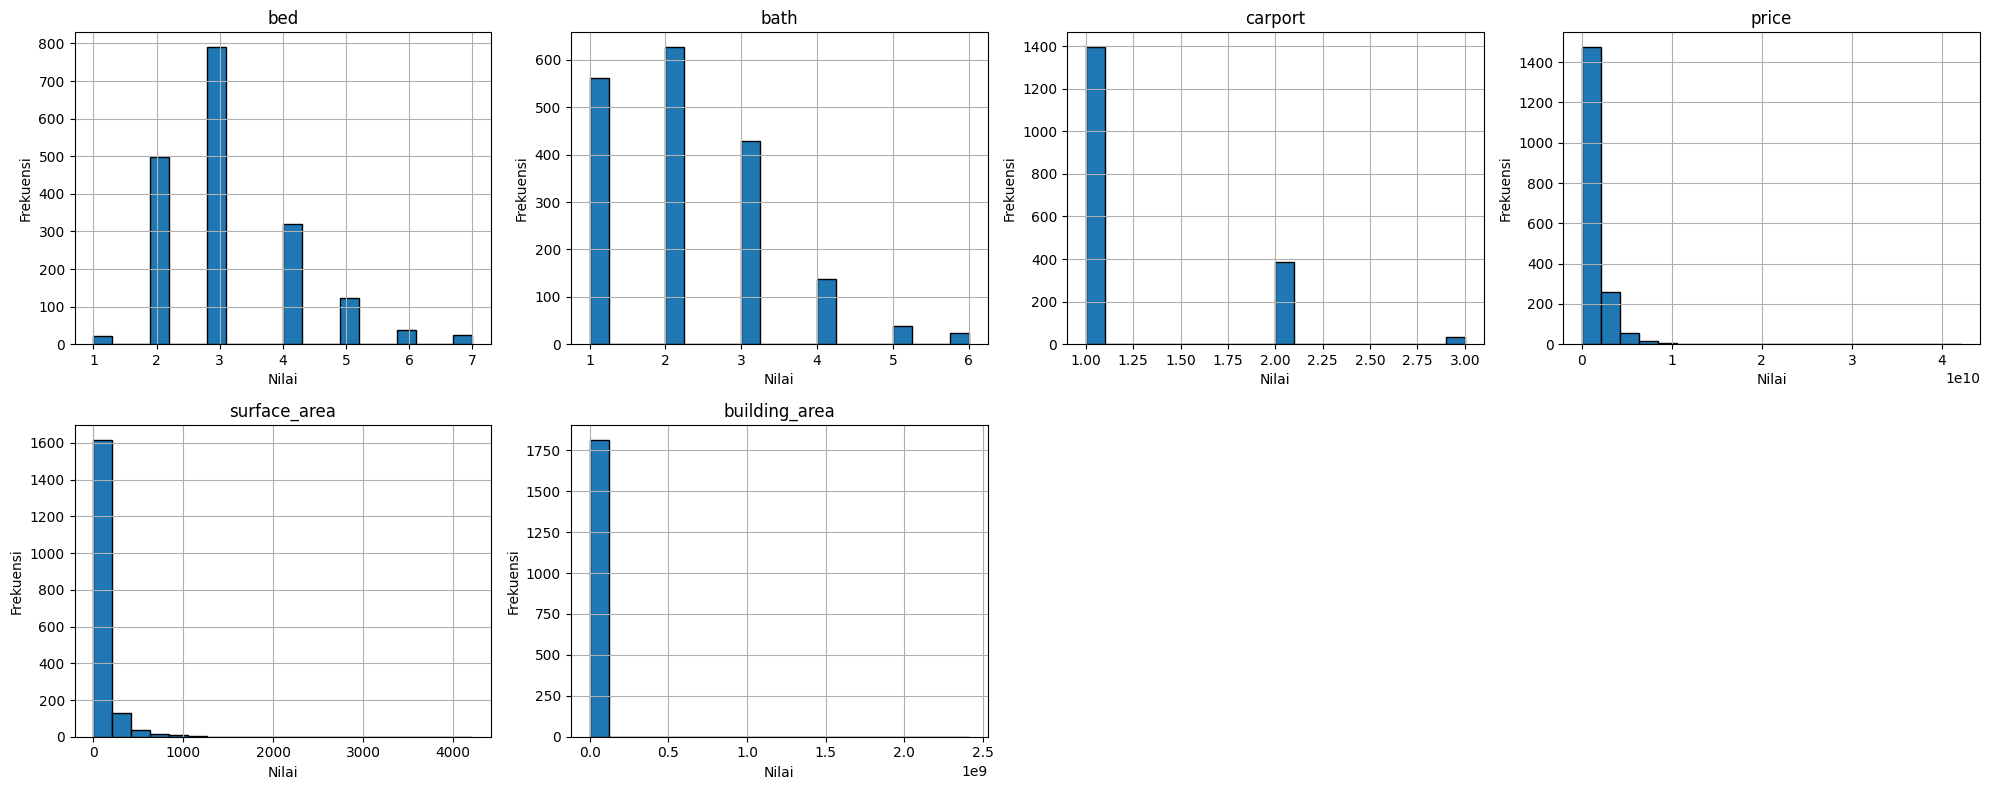

In [26]:
# Pilih hanya kolom numerik
num_df = df.select_dtypes(include=['int64', 'float64'])

# Buat histogram seperti sebelumnya
num_vars = len(num_df.columns)
n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(num_df.columns):
    num_df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')

# Hapus sumbu yang tidak dipakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


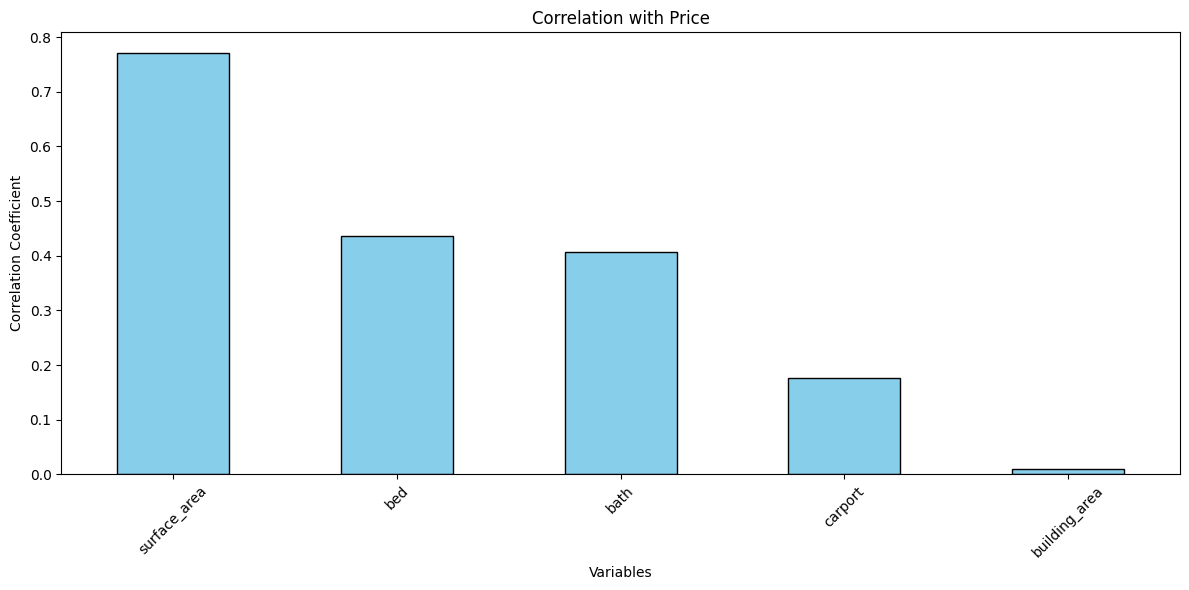

In [27]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Pastikan kolom 'price' ada
if 'price' in numeric_df.columns:
    # Hitung korelasi semua variabel numerik terhadap target 'price'
    target_corr = numeric_df.corr()['price'].drop('price')

    # Urutkan berdasarkan nilai absolut dari korelasi
    target_corr_sorted = target_corr.abs().sort_values(ascending=False)

    # Visualisasi
    plt.figure(figsize=(12, 6))
    target_corr_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Correlation with Price')
    plt.xlabel('Variables')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'price' tidak ditemukan atau bukan kolom numerik.")


#### Split Dataset

In [28]:
X = df.drop('price', axis=1)
y = df['price']


y_log = np.log1p(y)  # log(1 + y) untuk hindari log(0)

# Lalu split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


## Modelling

In [30]:
# Membuat model ANN
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(1, activation='linear'))


# Menyusun model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Melatih model dengan data training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 330.1274 - mae: 17.8256 - val_loss: 78.3201 - val_mae: 7.0750
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.3539 - mae: 5.3077 - val_loss: 19.0283 - val_mae: 2.9061
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.8172 - mae: 2.2228 - val_loss: 5.8065 - val_mae: 1.4259
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3129 - mae: 1.2236 - val_loss: 2.9192 - val_mae: 1.0484
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6630 - mae: 0.8673 - val_loss: 1.7525 - val_mae: 0.8343
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8398 - mae: 0.7139 - val_loss: 1.2187 - val_mae: 0.6840
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1303 - mae: 0.6128 - val_loss: 1.0365 - val_mae: 0.6881
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9616 - mae: 0.5720 - val_loss: 0.8000 - val_mae: 0.5830
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7082 

## Evaluasi dan Visualisasi

In [32]:
# Evaluasi model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test MAE (Mean Absolute Error):", test_mae)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2847 - mae: 0.3721 
Test Loss: 0.37005510926246643
Test MAE (Mean Absolute Error): 0.39038825035095215


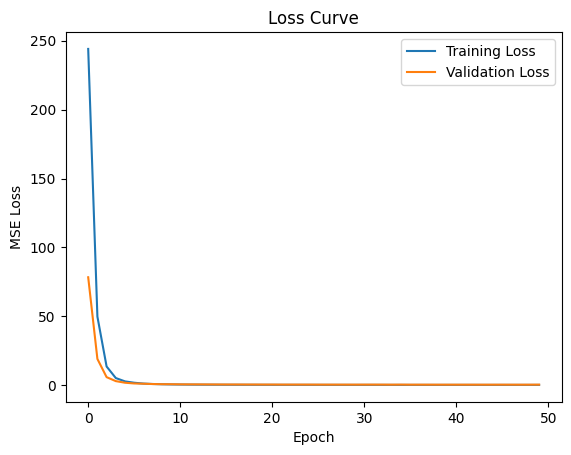

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


In [34]:
model.save("model.h5")

In [35]:
# Simpan scaler ke file
joblib.dump(scaler_X, 'scaler.pkl')


['scaler.pkl']

In [40]:
# Load model dan scaler
model = load_model('model.h5')
scaler = joblib.load('scaler.pkl')

# Daftar semua kolom input yang digunakan model
kolom_model = [
    'bed', 'bath', 'carport', 'surface_area', 'building_area',
    'listing-location_Banguntapan, Bantul',
    'listing-location_Bantul, Bantul',
    'listing-location_Bantul, Yogyakarta',
    'listing-location_Berbah, Sleman',
    'listing-location_Caturtunggal, Sleman',
    'listing-location_Caturtunggal, Yogyakarta',
    'listing-location_Cebongan, Sleman',
    'listing-location_Cebongan, Yogyakarta',
    'listing-location_Condong Catur, Sleman',
    'listing-location_Danurejan, Yogyakarta',
    'listing-location_Demangan, Yogyakarta',
    'listing-location_Depok, Sleman',
    'listing-location_Gamping, Sleman',
    'listing-location_Gedong Tengen, Yogyakarta',
    'listing-location_Godean, Sleman',
    'listing-location_Gondokusuman, Yogyakarta',
    'listing-location_Gondomanan, Yogyakarta',
    'listing-location_Imogiri              , Bantul',
    'listing-location_Imogiri, Yogyakarta',
    'listing-location_Jetis, Bantul',
    'listing-location_Jetis, Yogyakarta',
    'listing-location_Jombor, Sleman',
    'listing-location_Kalasan, Sleman',
    'listing-location_Kaliurang, Sleman',
    'listing-location_Kaliurang, Yogyakarta',
    'listing-location_Karangmojo, Gunung Kidul',
    'listing-location_Kasihan, Bantul',
    'listing-location_Kotagede, Yogyakarta',
    'listing-location_Kraton, Yogyakarta',
    'listing-location_Kulonprogo, Kulon Progo',
    'listing-location_Kulonprogo, Yogyakarta',
    'listing-location_Maguwoharjo, Yogyakarta',
    'listing-location_Mantrijeron, Yogyakarta',
    'listing-location_Mergangsan, Yogyakarta',
    'listing-location_Minggir, Sleman',
    'listing-location_Mlati, Sleman',
    'listing-location_Moyudan, Sleman',
    'listing-location_Nanggulan, Kulon Progo',
    'listing-location_Ngaglik, Sleman',
    'listing-location_Ngemplak, Sleman',
    'listing-location_Nologaten, Yogyakarta',
    'listing-location_Pajangan, Bantul',
    'listing-location_Pakem, Sleman',
    'listing-location_Pakualaman, Yogyakarta',
    'listing-location_Pandak, Bantul',
    'listing-location_Piyungan, Bantul',
    'listing-location_Playen, Gunung Kidul',
    'listing-location_Plered, Bantul',
    'listing-location_Pogung, Yogyakarta',
    'listing-location_Prambanan, Sleman',
    'listing-location_Purwomartani   , Sleman',
    'listing-location_Purwomartani, Yogyakarta',
    'listing-location_Sayegan, Sleman',
    'listing-location_Sedayu, Bantul',
    'listing-location_Sekip, Yogyakarta',
    'listing-location_Sentolo, Kulon Progo',
    'listing-location_Seturan, Yogyakarta',
    'listing-location_Sewon, Bantul',
    'listing-location_Sidoarum         , Sleman',
    'listing-location_Sleman, Sleman',
    'listing-location_Sleman, Yogyakarta',
    'listing-location_Tegalrejo, Yogyakarta',
    'listing-location_Tempel, Sleman',
    'listing-location_Turi, Sleman',
    'listing-location_Umbulharjo, Yogyakarta',
    'listing-location_Wates, Kulon Progo',
    'listing-location_Wirobrajan, Yogyakarta',
    'listing-location_Wonosari, Gunung Kidul'
]

# 1. Input dari user
bed = int(input("Masukkan jumlah kamar tidur (bed): "))
bath = int(input("Masukkan jumlah kamar mandi (bath): "))
carport = int(input("Masukkan jumlah carport (carport): "))
surface_area = float(input("Masukkan luas tanah (surface area) (m²): "))
building_area = float(input("Masukkan luas bangunan (building area) (m²): "))
lokasi_input = input("Masukkan lokasi (misal: Sleman, Sleman): ")

# 2. Siapkan dictionary kosong untuk input model
input_dict = dict.fromkeys(kolom_model, 0.0)

# 3. Isi nilai input numerik
input_dict['bed'] = bed
input_dict['bath'] = bath
input_dict['carport'] = carport
input_dict['surface_area'] = surface_area
input_dict['building_area'] = building_area

# 4. One-hot encoding manual untuk lokasi
kolom_lokasi = f'listing-location_{lokasi_input}'
if kolom_lokasi in kolom_model:
    input_dict[kolom_lokasi] = 1
else:
    print(f" Lokasi '{lokasi_input}' tidak tersedia dalam model.")
    exit()

# 5. Konversi ke DataFrame lalu scaling
df_input = pd.DataFrame([input_dict])
df_input_scaled = scaler.transform(df_input)

# 6. Prediksi
prediksi = model.predict(df_input_scaled)

# 7. Inverse transform prediksi log ke harga asli
harga_prediksi = np.expm1(prediksi[0][0])

print(f"\n P1rediksi harga JUAL rumah: Rp {harga_prediksi:,.0f}")



Masukkan jumlah kamar tidur (bed): 2
Masukkan jumlah kamar mandi (bath): 2
Masukkan jumlah carport (carport): 1
Masukkan luas tanah (surface area) (m²): 100
Masukkan luas bangunan (building area) (m²): 100
Masukkan lokasi (misal: Sleman, Sleman): Berbah, Sleman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

 P1rediksi harga JUAL rumah: Rp 712,562,688
